In [3]:
import pandas as pd
labels = pd.read_csv ('manual_labelling.csv')

In [4]:
labels.head()

,Image/Characters,Label,Point1_x,Point1_y,Point2_x,Point2_y,Point3_x,Point3_y,Point4_x,Point4_y,...,Point7_x,Point7_y,Point8_x,Point8_y,Point9_x,Point9_y,Point10_x,Point10_y,Point11_x,Point11_y
0,img_0000,55859550166,926,760,917,739,911,706,899,676,...,861,549,858,518,842,481,831,459,826,426
1,img_0011,55859530303,612,596,643,619,671,635,692,654,...,800,735,825,753,861,778,881,790,914,813
2,img_0022,55859520408,937,446,909,463,879,481,858,495,...,742,566,711,582,678,605,655,617,625,640
3,img_0033,55859550627,914,767,909,735,904,700,896,672,...,871,537,867,509,863,472,857,446,851,417
4,img_0044,55859560800,995,662,973,641,942,620,921,597,...,817,509,796,496,763,468,741,447,715,422


In [94]:
new_columns = [f'l{i}' for i in range (1,12)]
labels[new_columns] = labels['Label'].astype(str).str.split("",expand=True).iloc[:,1:-1]

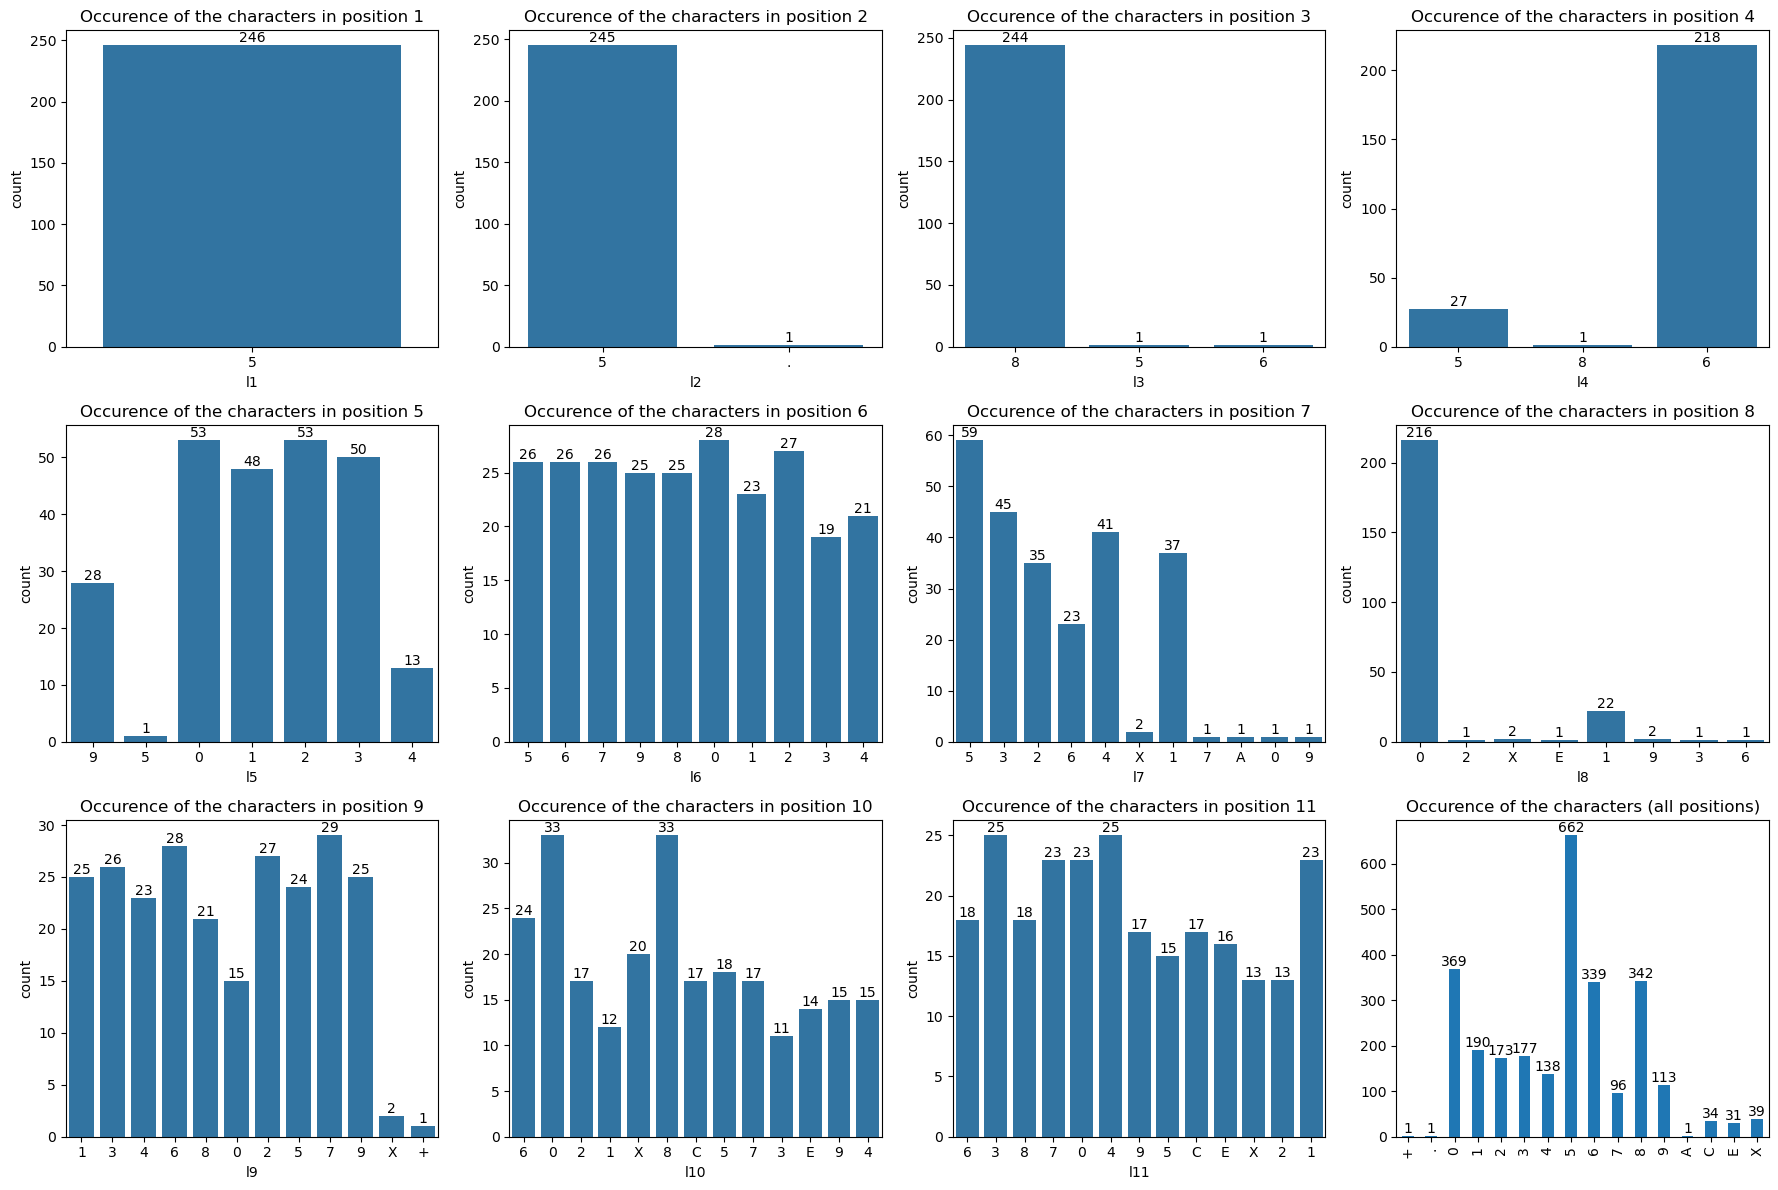

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(3,4, figsize=(18,12))

for i in range(11):
    row = i // 4
    column = i % 4
    ax = axs[row,column]
    sns.countplot(data= labels, x= f'l{i+1}', ax= ax)
    ax.bar_label(ax.containers[0])
    ax.set_title(f'Occurence of the characters in position {i+1}')
    plt.tight_layout()

ax = axs[2,3]
occurrences = labels[[f'l{i}' for i in range (1,12)]].apply(lambda x: pd.Series(x).value_counts()).fillna(0).astype(int).sum(axis=1)
occurrences.plot(kind='bar', ax=ax)
ax.bar_label(ax.containers[0])
ax.set_title('Occurence of the characters (all positions)')
plt.show()

In [114]:
occurrences.sort_values()

428     1
599     1
601     1
603     1
604     1
       ..
937    15
706    16
734    16
914    17
783    18
Length: 454, dtype: int64

In [127]:
'''
occurrences = labels[[f'Point{i}_x' for i in range (1,12)]].apply(lambda x: pd.Series(x).value_counts()).fillna(0).astype(int).sum(axis=1)
occurrences.plot(kind='bar', figsize=(16,6))
ax.bar_label(ax.containers[0])
ax.set_title('Occurence of the characters (all positions)')
plt.show()
'''

"\noccurrences = labels[[f'Point{i}_x' for i in range (1,12)]].apply(lambda x: pd.Series(x).value_counts()).fillna(0).astype(int).sum(axis=1)\noccurrences.plot(kind='bar', figsize=(16,6))\nax.bar_label(ax.containers[0])\nax.set_title('Occurence of the characters (all positions)')\nplt.show()\n"

In [ ]:
for i in range(11):
    row = i // 4
    column = i % 4
    ax = axs[row,column]

sns.countplot(data= labels, x= f'l{i+1}', ax= ax)
    ax.bar_label(ax.containers[0])
    ax.set_title(f'Occurence of the characters in position {i+1}')
    plt.tight_layout()

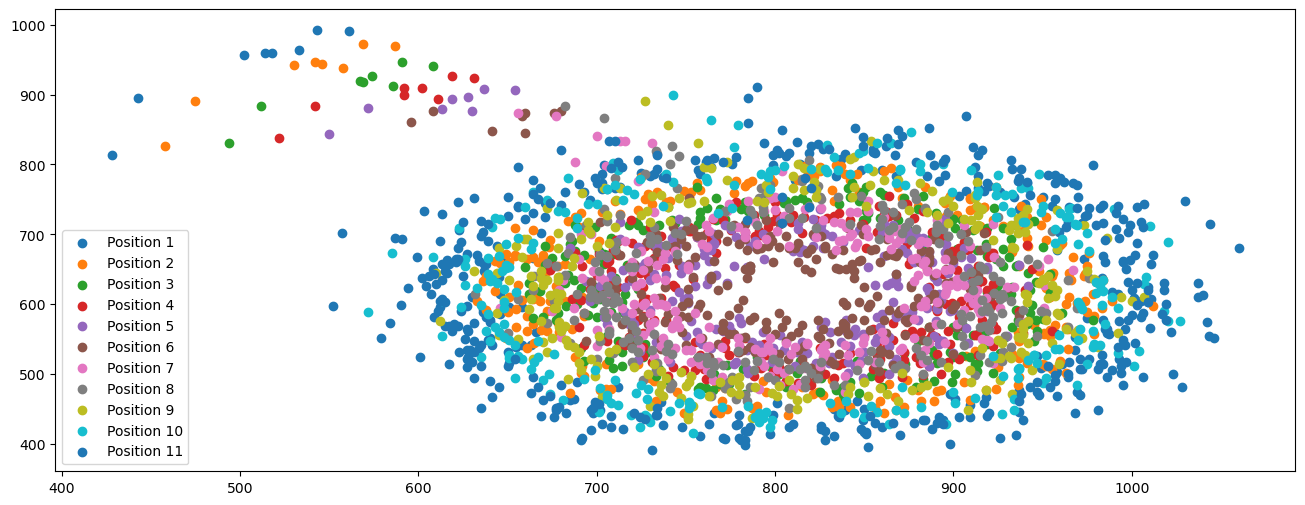

In [122]:
plt.figure(figsize=(16,6))
for i in range(1, 12):
    plt.scatter(labels[f'Point{i}_x'], labels[f'Point{i}_y'], marker='o', label=f'Position {i}')
    plt.legend()

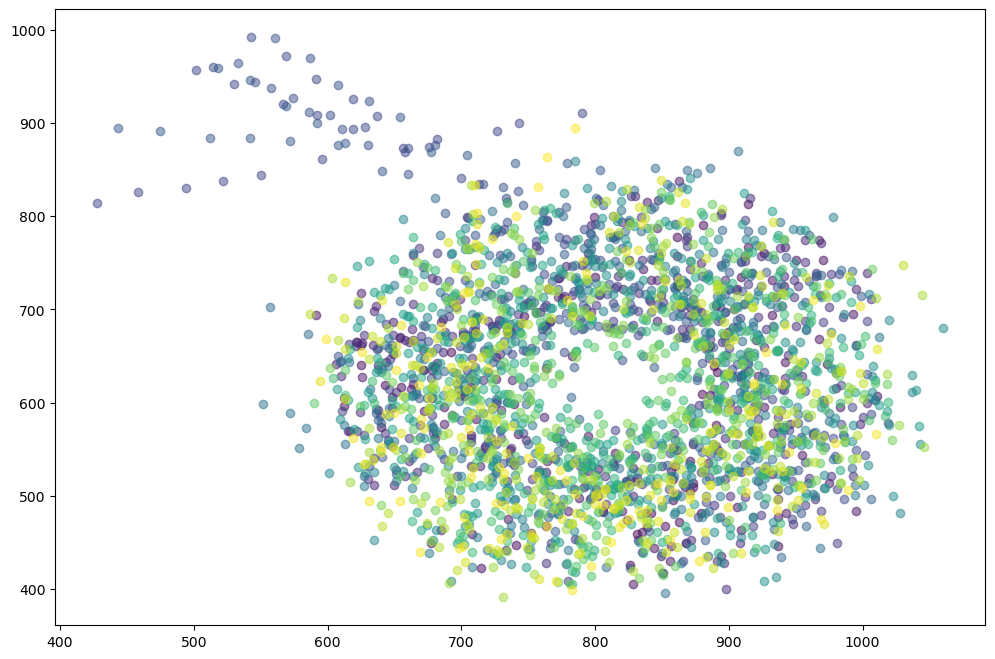

In [126]:
import numpy as np
rows = len(labels)-1
colors = plt.cm.viridis(np.linspace(0, 1, rows))

# Creating a scatter plot
plt.figure(figsize=(12, 8))

# Iterating through the rows of the labels (different images)
for index in range(rows):
    plt.scatter(labels.loc[index, [f'Point{i}_x' for i in range(1,12)]],
                labels.loc[index, [f'Point{i}_y' for i in range(1,12)]],
                color=colors[index], alpha=0.5)